Setting up connection with the twitter
Fetching screen names: ['imVkohli', 'akshaykumar', 'SrBachchan', 'narendramodi']
Fetched screen names ['SrBachchan', 'akshaykumar', 'imVkohli', 'narendramodi']
Friends per person:
SrBachchan 1836
akshaykumar 26
imVkohli 53
narendramodi 2267
Friends those are most common :
[(18839785, 3), (19895282, 3), (59808841, 3), (76294950, 3), (92708272, 3), (92945681, 3), (135421739, 3), (358814014, 3), (381949397, 3), (1176135546, 3)]
Friend Overlap:
[('SrBachchan', 'narendramodi', 210), ('SrBachchan', 'imVkohli', 26), ('imVkohli', 'narendramodi', 12), ('SrBachchan', 'akshaykumar', 11), ('akshaykumar', 'narendramodi', 5), ('akshaykumar', 'imVkohli', 2)]
Total nodes 244  and  total edges 493 in the graph 


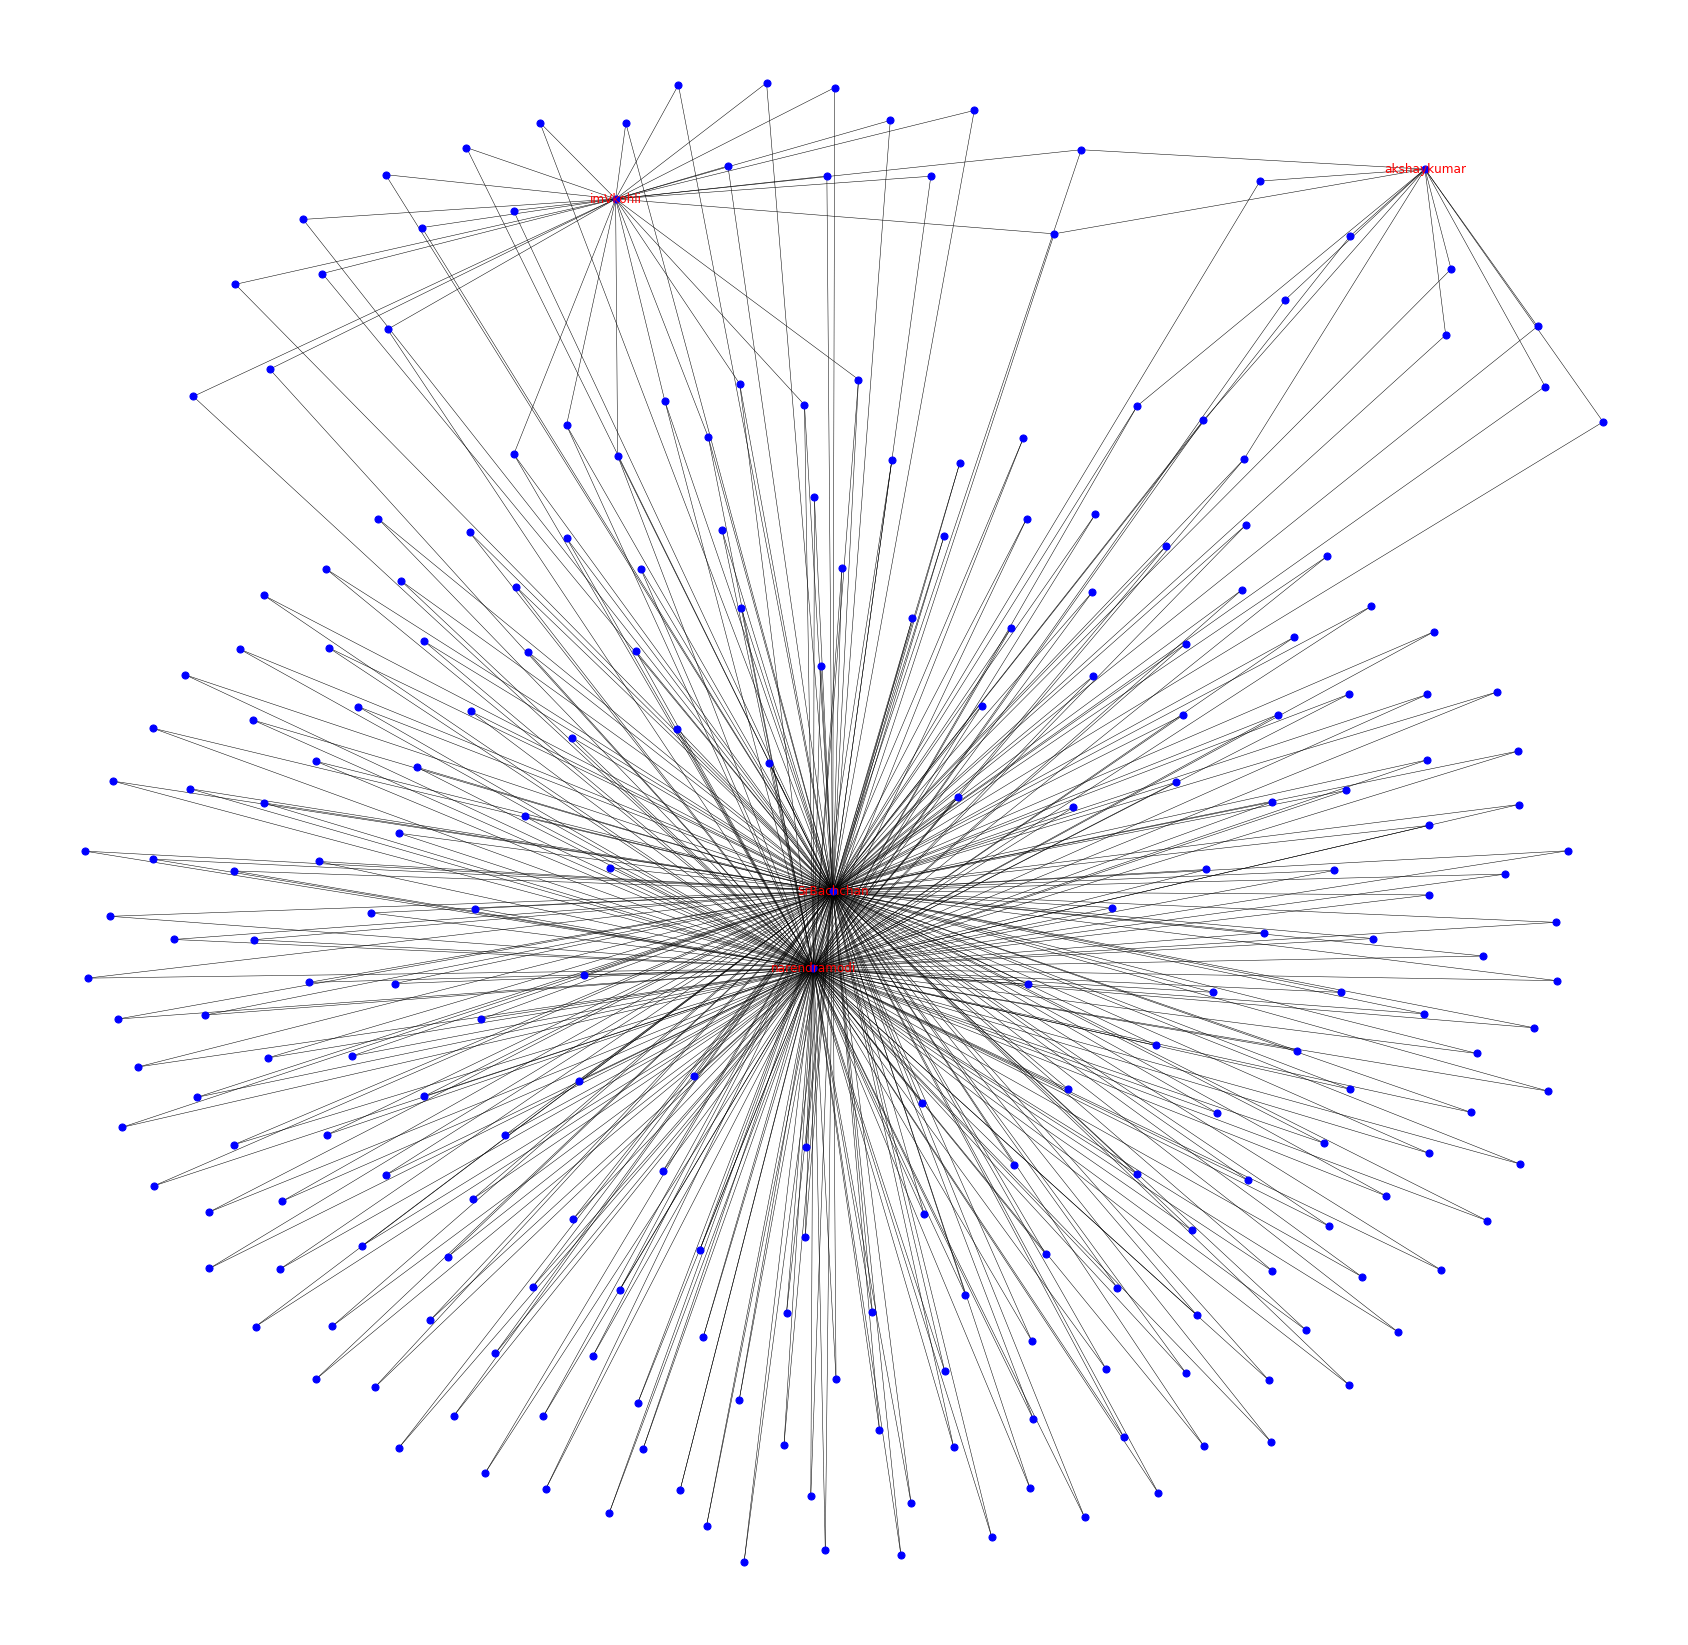

network is drawn to network.png


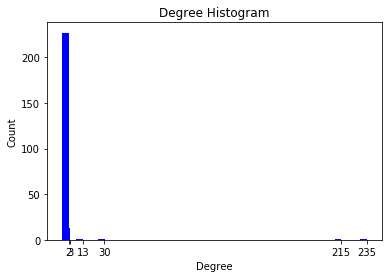

,name,Betweenness_centrality
0,SrBachchan,0.568097
1,akshaykumar,0.001653
2,imVkohli,0.008759
3,narendramodi,0.414077


,name,Degree_centrality
0,SrBachchan,0.967078
1,akshaykumar,0.053498
2,imVkohli,0.123457
3,narendramodi,0.884774


,name,Closeness_centrality
0,SrBachchan,0.949219
1,akshaykumar,0.347143
2,imVkohli,0.364865
3,narendramodi,0.820946


,name,Page_rank
0,SrBachchan,0.219635
1,akshaykumar,0.012441
2,imVkohli,0.027760
3,narendramodi,0.200904


,values
avg. path length,2.001687
diameter,4.000000
radius,3.000000


In [3]:
%matplotlib inline
from collections import Counter
import collections
import matplotlib.pyplot as plt
# import matplotlib.ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.pyplot import figure
import sys
import pandas as pd
import numpy as np
import time
from TwitterAPI import TwitterAPI
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from IPython.display import display
import networkx as nx

# TOKENS

consumer_key = '9XGSTs1Oh2f7xV0D15mtKvJlJ'
consumer_secret = 'wqNFoWuygJvAaqnv1wuVJOCBsg7zqPjLg9AGBe5myHGBkq0agq'
access_token = '462268397-PFx4pdJMyC0bpdmbUoyIIxpyrROcLZzmgI2Edh10'
access_token_secret = 'Hlia2fPkpFCtcsWWvGy6EH0rxvthXP5uSrykSGpDBHOTU'

# HELPER FUNCTION IS USED BY OTHER FUNCTIONS
def helper(twitter, res, parameter, trial=6):
    for t in range(trial):
        request = twitter.request(res, parameter)
        if request.status_code == 200:
            return request
        else:
            print('There is an error %s \nsleeping for 15 minutes.' % request.text)
            sys.stderr.flush()
            time.sleep(61 * 15)

# TO ESTABLISH TWITTER CONNECTION
def start_twitter():
    return TwitterAPI(consumer_key, consumer_secret, access_token, access_token_secret)

#TO FETCH THE SCREEN NAME FROM THE FILE
def fetch_scr_name(f_name):
    with open(f_name) as f:
        name = f.read().splitlines()
    f.close()
    return name
            
#USER_DATA_EXTRACTION
def list_of_users(twitter, screen_names):
    get_user = helper(twitter,'users/lookup',{'screen_name': screen_names})
    u_list = []
    for u in get_user:
        u_list.append(u)   
    return u_list

#LIST OF ALL FRIENDS
def list_of_friends(twitter, screen_name):
    get_friends = helper(twitter,'friends/ids',{'screen_name' : screen_name, 'count': 5000})
    f_list = []
    for f in get_friends:
        f_list.append(f)
    return (sorted(f_list))


def all_friends(twitter, users):
    length = len(users)
    add_friends = []
    for a in range(length):
        users[a]['friends'] = list_of_friends(twitter, users[a].get('screen_name'))
#         print(users[a]['friends']) 
        
#TO DISPLAY FRIEND COUNT    
def tot_friends(users):
    l = len(users)
    root=[]
    friends=[]
    for n in range(l):
        root.append(users[n].get('screen_name'))
        friends.append(users[n].get('friends_count'))
    for i in range(l):
        print('%s %s' % (root[i],friends[i])) 
        
#TO COUNT
def friend_count(users):
    l = len(users)
    count = Counter()
    for i in range(l):
        for j in users[i].get('friends'):
            count[j]=count[j]+1
    return count         
                         
#TO FIND FRIEND INTERSECTION    
def intersect(users):
    com = 0
    i_list = []
    for i in range(len(users)):
        for j in range(i+1,len(users)):
            i_list .append((users[i].get('screen_name'),users[j].get('screen_name'),len(set(users[i].get('friends')) & set(users[j].get('friends')))))
    sorted_list = sorted(sorted([desc for desc in i_list ],key=lambda x:x[0]),key=lambda x:x[2],reverse = True)
    return sorted_list
    
#GRAPH CREATION
def graph_creation(users, friend_c):
    g = nx.Graph()
    l = len(users)
    for i in range(l):
        name = users[i].get('screen_name')
        g.add_node(name)    
    for i in range(l):
        for j in users[i].get('friends'):
            if friend_c[j] > 1:
                g.add_node(j)
                g.add_edge(j,users[i].get('screen_name'))
    return g
        
#GRAPH REPRESENTATION
def network_of_people(graph, users, filename):
    n = dict()
    for u in users:
        n[u['screen_name']] = u['screen_name']
    plt.figure(figsize=(30,30))
    nx.draw_networkx(graph,labels=n,width=.5,node_size=50,font_size=12,node_color='b',font_color='red')
    plt.axis("off")
    plt.savefig(filename)
    plt.show()
            
#NETWORK MEASURES        
def get_all_graph_metrics(G):
    index = [
        "avg. path length",
        "diameter",
        "radius",
    ]
    values = []
    try:
        values.append(nx.average_shortest_path_length(G))
    except nx.NetworkXError:
        values.append(np.nan)
    try:
        values.append(nx.diameter(G))
    except nx.NetworkXError:
        values.append(np.nan)
    try:
        values.append(nx.radius(G))
    except nx.NetworkXError:
        values.append(np.nan)
    df_measures = pd.DataFrame(
        np.array([values]).T,
        columns=["values"],
        index=index
    )
    return df_measures

#MAIN FUNCTION
def main():
    
    twitter = start_twitter()
    print('Setting up connection with the twitter')
           
    screen_names = fetch_scr_name('sample.txt')
    print('Fetching screen names: %s' % screen_names)
           
    users = sorted(list_of_users(twitter, screen_names), key=lambda x: x['screen_name'])
    print('Fetched screen names %s' % str([u['screen_name'] for u in users]))
           
    all_friends(twitter, users)

    print('Friends per person:')
    tot_friends(users)
    friend_c = friend_count(users)

    print('Friends those are most common :\n%s' % str(friend_c.most_common(10)))

    print('Friend Overlap:\n%s' % str(intersect(users)))
    
#GRAPH CREATION

    graph = graph_creation(users, friend_c)
    print('Total nodes %s  and  total edges %s in the graph ' % (len(graph.nodes()), len(graph.edges())))
    network_of_people(graph, users, 'network.png')
    print('network is drawn to network.png')
#PLEASE CHECK THE FOLDER FOR THE GRAPH
#CRAETING DEGREE DISTRIBUTION(HISTOGRAM)

    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=5, color='b')
    orientation=u'vertical',
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 2.4 for d in deg])
    ax.set_xticklabels(deg)
    plt.show()
    
#OTHER CENTRALITY MEASURES

    bet_cen=nx.betweenness_centrality(graph)
    
    df=pd.DataFrame(list(bet_cen.items()), columns=['name', 'Betweenness_centrality'])
    display(df.head(4))
    
    deg_cen=nx.degree_centrality(graph)
    df=pd.DataFrame(list(deg_cen.items()), columns=['name', 'Degree_centrality'])
    display(df.head(4))

    clo_cen=nx.closeness_centrality(graph)
    df=pd.DataFrame(list(clo_cen.items()), columns=['name', 'Closeness_centrality'])
    display(df.head(4))

    pag_ran=nx.pagerank(graph)
    df=pd.DataFrame(list(pag_ran.items()), columns=['name', 'Page_rank'])
    display(df.head(4))
    
    df_graph_metrics = get_all_graph_metrics(graph)
    display(df_graph_metrics)

if __name__ == '__main__':
    main()